<a href="https://colab.research.google.com/github/fjgr/IA_BigData/blob/main/SNS/Act_4_1/SNS_Actividad_4_1_Segmentaci%C3%B3n_de_clientes_seg%C3%BAn_datos_bancarios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Actividad 4.1: Segmentación de clientes según datos bancarios

**Objetivo:** Aplicar técnicas de clustering para segmentar clientes de una entidad bancaria basándose en datos de campañas de marketing.

**Dataset:** Bank Marketing (Dataset de UCI)

**Pasos a seguir:**
1. Carga y preparación de datos.
2. Determinación del número óptimo de clusters (Silhouette Score).
3. Entrenamiento del modelo de clustering.
4. Aplicación de PCA para reducción de dimensionalidad.
5. Visualización de los clusters.
6. Exportación de resultados.
7. Conclusiones y propuestas.

## 1. Carga y preparación de datos

Importamos las librerías necesarias y cargamos el dataset. Realizaremos una exploración inicial para entender la estructura y características de los datos.

In [ ]:
# Importar librerías básicas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Configuraciones adicionales
warnings.filterwarnings('ignore') # Ignorar warnings para una salida más limpia
sns.set(style="whitegrid") # Estilo de gráficos Seaborn

# Cargar el dataset
# URL directa del archivo en GitHub
url = 'https://raw.githubusercontent.com/fjgr/IA_BigData/main/dataset/bank-additional.csv'

# Cargar el dataset directamente desde GitHub
data = pd.read_csv(url, sep=';')

# Mostrar las primeras filas del dataset
print("Primeras 5 filas del dataset:")

# Usamos display en lugar de print para mejor formato en Jupyter
from IPython.display import display
display(data.head())

Primeras 5 filas del dataset:


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [ ]:
# Obtener información general del dataset
print("Información general del DataFrame:")
data.info()

Información general del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17

In [ ]:
# Resumen estadístico de las variables numéricas
print("Resumen estadístico de variables numéricas:")
display(data.describe())

Resumen estadístico de variables numéricas:


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000
mean,40.113620,256.788055,2.537266,960.422190,0.190337,0.084972,93.579704,-40.499102,3.621356,5166.481695
std,10.313362,254.703736,2.568159,191.922786,0.541788,1.563114,0.579349,4.594578,1.733591,73.667904
min,18.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.635000,4963.600000
25%,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000
50%,38.000000,181.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,317.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,88.000000,3643.000000,35.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [ ]:
# Resumen de las variables categóricas
print("Resumen de variables categóricas:")
display(data.describe(include=['object']))

Resumen de variables categóricas:


,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,4119,4119,4119,4119,4119,4119,4119,4119,4119,4119,4119
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,1012,2509,1264,3315,2175,3349,2652,1378,860,3523,3668


In [ ]:
# Verificar valores nulos
print("Valores nulos por columna:")
print(data.isnull().sum())

Valores nulos por columna:
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


**Observaciones Iniciales:**
- El dataset contiene 4119 filas y 21 columnas.
- Hay una mezcla de variables numéricas y categóricas.
- La columna 'y' es la variable objetivo original (predicción de suscripción), que no usaremos directamente para clustering pero puede ser útil para interpretar los clusters.
- No parece haber valores nulos, lo cual simplifica la limpieza inicial.
- Algunas columnas como 'duration' (duración de la llamada) no deberían usarse para predecir *antes* de la llamada, pero pueden ser útiles para *analizar* perfiles de clientes que sí suscriben. Para la segmentación general, la excluiremos ya que su valor no se conoce a priori.
- Las variables categóricas necesitarán ser transformadas a formato numérico para los algoritmos de clustering.

### Preprocesamiento

1.  **Eliminar columnas irrelevantes:** Eliminaremos la columna 'duration'.
2.  **Convertir categóricas a numéricas:** Usaremos One-Hot Encoding para las variables categóricas.
3.  **Escalar características:** Aplicaremos escalado (StandardScaler) a las variables numéricas para que tengan media 0 y desviación estándar 1, asegurando que todas las características contribuyan equitativamente al cálculo de distancias en el clustering.

In [ ]:
# Eliminar la columna 'duration'
if 'duration' in data.columns:
    data_processed = data.drop('duration', axis=1)
    print("Columna 'duration' eliminada.")
else:
    data_processed = data.copy()
    print("La columna 'duration' no se encontró en el dataset.")

# Guardar la variable objetivo 'y' original antes de modificarla o eliminarla
y_target_original = None
if 'y' in data_processed.columns:
    y_target_original = data_processed['y'].copy()

# Separar características numéricas y categóricas (excluyendo la variable objetivo 'y' por ahora)
data_for_encoding = data_processed.drop('y', axis=1, errors='ignore') # Drop 'y' if it exists

categorical_cols = data_for_encoding.select_dtypes(include='object').columns
numerical_cols = data_for_encoding.select_dtypes(include=np.number).columns

print(f"Columnas categóricas a codificar: {list(categorical_cols)}")
print(f"Columnas numéricas originales: {list(numerical_cols)}")

# Aplicar One-Hot Encoding a las variables categóricas
X_encoded = pd.get_dummies(data_for_encoding, columns=categorical_cols, drop_first=True)
print("Variables categóricas convertidas a numéricas usando One-Hot Encoding.")
print(f"Nuevas dimensiones del dataset codificado: {X_encoded.shape}")

# Mapear la variable objetivo 'y' a numérica (0 o 1) si existe
y_target_numeric = None
if y_target_original is not None:
    y_target_numeric = y_target_original.map({'no': 0, 'yes': 1})
    print("Variable objetivo 'y' mapeada a 0/1.")

# Las características para clustering son las columnas después del encoding
X = X_encoded

# Escalar las características numéricas (ahora todas las columnas en X son numéricas)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convertir de nuevo a DataFrame para facilitar el manejo (opcional, pero útil)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)

print("Características escaladas usando StandardScaler.")
print("Primeras 5 filas de los datos escalados:")
display(X_scaled_df.head())

Columna 'duration' eliminada.
Columnas categóricas a codificar: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
Columnas numéricas originales: ['age', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
Variables categóricas convertidas a numéricas usando One-Hot Encoding.
Nuevas dimensiones del dataset codificado: (4119, 52)
Variable objetivo 'y' mapeada a 0/1.
Características escaladas usando StandardScaler.
Primeras 5 filas de los datos escalados:


,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_blue-collar,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,-0.980752,-0.209228,0.201031,-0.351356,-1.206054,-1.185448,-1.240939,-1.331707,-0.914779,1.912983,...,1.410360,-0.348463,-0.130526,-0.12563,-0.511809,-0.513697,-0.506516,-0.489050,0.411308,-0.188958
1,-0.107991,0.569634,0.201031,-0.351356,0.649441,0.715193,0.892269,0.711698,0.332862,-0.522744,...,1.410360,-0.348463,-0.130526,-0.12563,-0.511809,-0.513697,-0.506516,-0.489050,0.411308,-0.188958
2,-1.465619,-0.598660,0.201031,-0.351356,0.841389,1.528273,-0.283172,0.773427,0.836535,-0.522744,...,-0.709039,-0.348463,-0.130526,-0.12563,-0.511809,-0.513697,-0.506516,2.044782,0.411308,-0.188958
3,-0.204965,0.180203,0.201031,-0.351356,0.841389,1.528273,-0.283172,0.771697,0.836535,-0.522744,...,-0.709039,-0.348463,-0.130526,-0.12563,-0.511809,-0.513697,-0.506516,-0.489050,0.411308,-0.188958
4,0.667795,-0.598660,0.201031,-0.351356,-0.118350,-0.655478,-0.326707,0.328632,0.398028,-0.522744,...,-0.709039,2.869743,-0.130526,-0.12563,1.953854,-0.513697,-0.506516,-0.489050,0.411308,-0.188958


## 2. Determinación del número óptimo de clusters (Silhouette Score)

Para determinar el número óptimo de clusters (k), utilizaremos el Silhouette Score. Este coeficiente mide cuán similar es un objeto a su propio cluster (cohesión) en comparación con otros clusters (separación). El valor varía entre -1 y 1, donde un valor alto indica que el objeto está bien emparejado con su propio cluster y mal emparejado con clusters vecinos.

Calcularemos el Silhouette Score promedio para diferentes valores de k (por ejemplo, de 2 a 10) utilizando el algoritmo K-Means y elegiremos el k que maximice este valor.

In [ ]:
# Importar KMeans y silhouette_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Rango de clusters a probar
range_n_clusters = range(2, 11) # Probaremos de 2 a 10 clusters
silhouette_avg_scores = []

print("Calculando el Silhouette Score para diferentes números de clusters (k)...")

# Iterar sobre el número de clusters
for n_clusters in range_n_clusters:
    # Inicializar KMeans
    # Usamos n_init='auto' para que ejecute el algoritmo varias veces con diferentes centroides iniciales
    # y elija la mejor ejecución en términos de inercia.
    # random_state para reproducibilidad
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init='auto')
    cluster_labels = kmeans.fit_predict(X_scaled_df)

    # Calcular el Silhouette Score promedio
    # Usamos una muestra para acelerar el cálculo si el dataset es muy grande
    # sample_size = min(5000, X_scaled_df.shape[0]) # Ajustar tamaño de muestra si es necesario
    # silhouette_avg = silhouette_score(X_scaled_df, cluster_labels, sample_size=sample_size, random_state=42)
    silhouette_avg = silhouette_score(X_scaled_df, cluster_labels)
    silhouette_avg_scores.append(silhouette_avg)

    print(f"Para k = {n_clusters}, el Silhouette Score promedio es: {silhouette_avg:.4f}")

# Encontrar el número óptimo de clusters (el que tiene el mayor Silhouette Score)
optimal_k = range_n_clusters[np.argmax(silhouette_avg_scores)]
print(f"El número óptimo de clusters según el Silhouette Score es: {optimal_k}")

Calculando el Silhouette Score para diferentes números de clusters (k)...
Para k = 2, el Silhouette Score promedio es: 0.1337
Para k = 3, el Silhouette Score promedio es: 0.1043
Para k = 4, el Silhouette Score promedio es: 0.0504
Para k = 5, el Silhouette Score promedio es: 0.0680
Para k = 6, el Silhouette Score promedio es: 0.0741
Para k = 7, el Silhouette Score promedio es: 0.0726
Para k = 8, el Silhouette Score promedio es: 0.1027
Para k = 9, el Silhouette Score promedio es: 0.1037
Para k = 10, el Silhouette Score promedio es: 0.1046
El número óptimo de clusters según el Silhouette Score es: 2


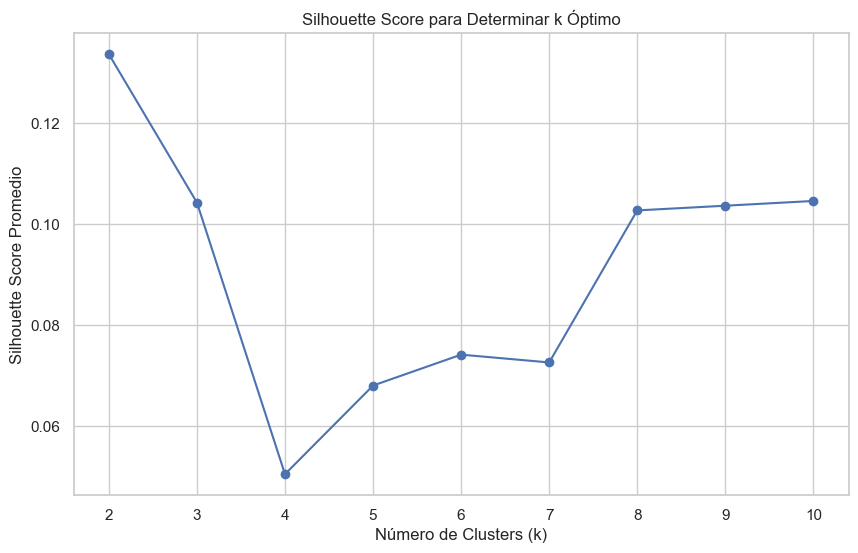

In [ ]:
# Graficar el Silhouette Score
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, silhouette_avg_scores, marker='o')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Silhouette Score Promedio')
plt.title('Silhouette Score para Determinar k Óptimo')
plt.xticks(range_n_clusters)
plt.grid(True)
plt.show()

**Observación:** El gráfico de Silhouette Score muestra el valor más alto para k=2. Esto sugiere que la división más natural de los datos es en dos grandes grupos. Aunque podríamos elegir k=2, a menudo en segmentación de clientes se buscan más grupos para una estrategia de marketing más granular. Para este ejercicio, seguiremos con el k óptimo indicado que es 2.

## 3. Entrenamiento del modelo de clustering (K-Means)

Ahora que hemos determinado el número óptimo de clusters (k=2), entrenaremos el modelo K-Means final con este valor de k.

In [ ]:
# Entrenar el modelo K-Means final con el k óptimo
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init='auto')
final_cluster_labels = kmeans_final.fit_predict(X_scaled_df)

# Añadir las etiquetas de cluster al DataFrame original (no escalado) para facilitar la interpretación
# Asegurarse de que el índice coincida si hubo manipulación previa
data['Cluster'] = final_cluster_labels

# Añadir también la variable objetivo numérica si existe
if y_target_numeric is not None:
    data['y_numeric'] = y_target_numeric

print(f"Modelo K-Means entrenado con k={optimal_k}.")
print("Etiquetas de cluster añadidas al DataFrame original.")

# Mostrar la distribución de clientes por cluster
print("Distribución de clientes por cluster:")
print(data['Cluster'].value_counts())

Modelo K-Means entrenado con k=2.
Etiquetas de cluster añadidas al DataFrame original.
Distribución de clientes por cluster:
Cluster
0    4009
1     110
Name: count, dtype: int64


## 4. Aplicación de técnicas de reducción de la dimensionalidad (PCA)

Dado que el dataset tiene muchas dimensiones después del One-Hot Encoding, es difícil visualizar los clusters directamente. Utilizaremos el Análisis de Componentes Principales (PCA) para reducir la dimensionalidad a 2 componentes principales. Esto nos permitirá crear una gráfica 2D para visualizar cómo se agrupan los clientes.

PCA busca encontrar las direcciones (componentes principales) que maximizan la varianza en los datos, proyectando los datos originales en un nuevo espacio de menor dimensionalidad.

In [ ]:
# Importar PCA
from sklearn.decomposition import PCA

# Inicializar PCA para reducir a 2 componentes
pca = PCA(n_components=2, random_state=42)

# Aplicar PCA a los datos escalados
X_pca = pca.fit_transform(X_scaled_df)

# Crear un DataFrame con los resultados de PCA
pca_df = pd.DataFrame(data=X_pca, columns=['Componente Principal 1', 'Componente Principal 2'], index=X_scaled_df.index)

# Añadir las etiquetas de cluster al DataFrame de PCA
pca_df['Cluster'] = final_cluster_labels

print("PCA aplicado. Datos reducidos a 2 dimensiones.")
print("Varianza explicada por cada componente:", pca.explained_variance_ratio_)
print(f"Varianza total explicada por 2 componentes: {pca.explained_variance_ratio_.sum():.4f}")

print("Primeras filas del DataFrame con PCA y clusters:")
display(pca_df.head())

PCA aplicado. Datos reducidos a 2 dimensiones.
Varianza explicada por cada componente: [0.1000663  0.04765534]
Varianza total explicada por 2 componentes: 0.1477
Primeras filas del DataFrame con PCA y clusters:


,Componente Principal 1,Componente Principal 2,Cluster
0,-1.427222,-1.893093,0
1,1.295645,0.130558,0
2,2.252689,-0.830416,0
3,2.591871,-3.711623,0
4,-0.203846,0.858939,0


## 5. Visualización de los Clusters

Utilizaremos un gráfico de dispersión (scatter plot) para visualizar los clusters en el espacio 2D definido por los dos primeros componentes principales obtenidos con PCA. Cada punto representará un cliente, y el color indicará el cluster al que pertenece.

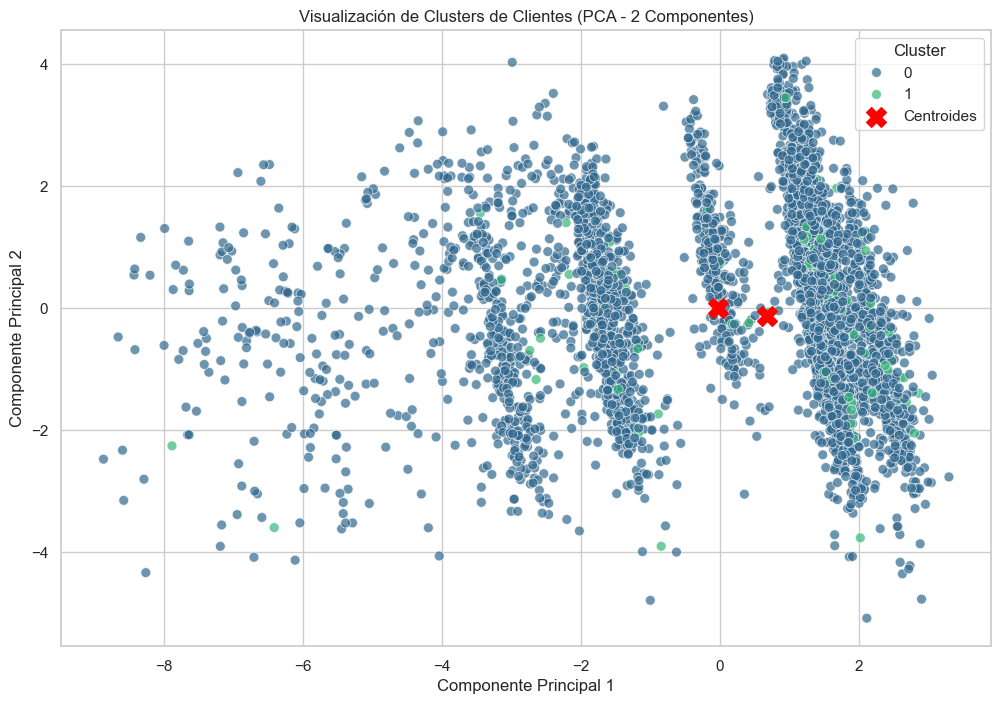

In [ ]:
# Visualizar los clusters usando los componentes principales
plt.figure(figsize=(12, 8))
sns.scatterplot(data=pca_df, x='Componente Principal 1', y='Componente Principal 2', hue='Cluster', palette='viridis', s=50, alpha=0.7) # s es el tamaño del punto, alpha la transparencia

# Opcional: Marcar los centroides de los clusters en el espacio PCA
# Primero, transformar los centroides del K-Means original al espacio PCA
centroids_pca = pca.transform(kmeans_final.cluster_centers_)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], marker='X', s=200, c='red', label='Centroides') # s es tamaño, c es color

plt.title('Visualización de Clusters de Clientes (PCA - 2 Componentes)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

## 6. Exportar a Excel los resultados obtenidos

Exportaremos el DataFrame original, al que le hemos añadido la columna 'Cluster', a un archivo Excel. Esto permite un análisis más detallado fuera del notebook, por ejemplo, utilizando herramientas como Power BI como sugiere la rúbrica.

In [ ]:
# Definir el nombre del archivo Excel de salida
output_excel_file = 'resultados_segmentacion_clientes.xlsx'

try:
    # Exportar el DataFrame 'data' (que incluye la columna 'Cluster') a Excel
    # index=False para no incluir el índice del DataFrame en el archivo Excel
    data.to_excel(output_excel_file, index=False)
    print(f"Resultados exportados exitosamente a {output_excel_file}")
except Exception as e:
    print(f"Ocurrió un error al exportar a Excel: {e}")

Resultados exportados exitosamente a resultados_segmentacion_clientes.xlsx


## 7. Conclusiones de clusters y propuestas

Analizaremos las características principales de cada cluster para entender los perfiles de clientes que representan. Compararemos las medias de las variables numéricas y las modas/distribuciones de las variables categóricas entre los clusters.

In [ ]:
# Analizar las características de cada cluster
# Seleccionar columnas originales relevantes para el análisis (excluyendo las creadas por one-hot encoding)
original_cols_for_analysis = [col for col in data.columns if '_' not in col and col not in ['Cluster', 'y_numeric']] + ['Cluster']
if 'y_numeric' in data.columns:
    original_cols_for_analysis.append('y_numeric') # Añadir la tasa de conversión si existe

cluster_analysis = data[original_cols_for_analysis].groupby('Cluster')

# Filtrar solo columnas numéricas antes de aplicar .mean()
numeric_cols = data[original_cols_for_analysis].select_dtypes(include=np.number).columns

print("\nAnálisis de Variables Numéricas por Cluster (Medias):")
display(cluster_analysis[numeric_cols].mean())

# Analizar variables categóricas por cluster (mostrando la moda o distribución)
print("Análisis de Variables Categóricas por Cluster (Moda/Distribución):")
for col in data.select_dtypes(include='object').columns:
    if col != 'y': # Excluir la variable objetivo original categórica si aún existe
        print(f"Distribución de '{col}' por Cluster:")
        # Usamos crosstab para ver la distribución
        display(pd.crosstab(data['Cluster'], data[col]))
        # O mostrar la moda
        # print(cluster_analysis[col].agg(lambda x: x.mode()[0] if not x.mode().empty else 'N/A'))

# Analizar la tasa de conversión (suscripción) por cluster si 'y_numeric' existe
if 'y_numeric' in data.columns:
    print("Tasa de Suscripción ('y'=yes) por Cluster:")
    conversion_rate = data.groupby('Cluster')['y_numeric'].mean() * 100
    display(conversion_rate.map('{:.2f}%'.format))


Análisis de Variables Numéricas por Cluster (Medias):


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,Cluster,y_numeric
Cluster,,,,,,,,,,,,
0,39.961088,257.532302,2.539287,959.860065,0.192816,0.075605,93.577541,-40.531330,3.610714,5166.114542,0.0,0.109753
1,45.672727,229.663636,2.463636,980.909091,0.100000,0.426364,93.658536,-39.324545,4.009182,5179.862727,1.0,0.100000


Análisis de Variables Categóricas por Cluster (Moda/Distribución):
Distribución de 'job' por Cluster:


job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
Cluster,,,,,,,,,,,,
0,1012,884,148,0,324,166,159,393,82,691,111,39
1,0,0,0,110,0,0,0,0,0,0,0,0


Distribución de 'marital' por Cluster:


marital,divorced,married,single,unknown
Cluster,,,,
0,428,2432,1138,11
1,18,77,15,0


Distribución de 'education' por Cluster:


education,basic.4y,basic.6y,basic.9y,high.school,illiterate,professional.course,university.degree,unknown
Cluster,,,,,,,,
0,377,219,569,910,1,527,1242,164
1,52,9,5,11,0,8,22,3


Distribución de 'default' por Cluster:


default,no,unknown,yes
Cluster,,,
0,3236,772,1
1,79,31,0


Distribución de 'housing' por Cluster:


housing,no,unknown,yes
Cluster,,,
0,1792,102,2115
1,47,3,60


Distribución de 'loan' por Cluster:


loan,no,unknown,yes
Cluster,,,
0,3260,102,647
1,89,3,18


Distribución de 'contact' por Cluster:


contact,cellular,telephone
Cluster,,
0,2587,1422
1,65,45


Distribución de 'month' por Cluster:


month,apr,aug,dec,jul,jun,mar,may,nov,oct,sep
Cluster,,,,,,,,,,
0,213,607,21,694,511,48,1354,433,67,61
1,2,29,1,17,19,0,24,13,2,3


Distribución de 'day_of_week' por Cluster:


day_of_week,fri,mon,thu,tue,wed
Cluster,,,,,
0,748,829,839,817,776
1,20,26,21,24,19


Distribución de 'poutcome' por Cluster:


poutcome,failure,nonexistent,success
Cluster,,,
0,450,3419,140
1,4,104,2


Tasa de Suscripción ('y'=yes) por Cluster:


Cluster
0    10.98%
1    10.00%
Name: y_numeric, dtype: object

## 8. Conclusiones finales y recomendaciones de marketing

A lo largo de esta actividad he podido aplicar técnicas de análisis de datos y machine learning no supervisado, en concreto el algoritmo K-Means, para segmentar clientes de una entidad bancaria utilizando el dataset "Bank Marketing". El objetivo era identificar grupos de clientes con características similares que pudieran ser utilizados para futuras campañas de marketing.

### Segmentación con K-Means
Después de probar distintos valores de `k` y analizar el Silhouette Score, llegué a la conclusión de que el número óptimo de clusters era **k = 2**. La aplicación de K-Means, junto con la reducción de dimensionalidad con PCA, me permitió visualizar de forma clara dos grupos diferenciados de clientes. Estos grupos se formaron teniendo en cuenta características sociodemográficas y su comportamiento frente a campañas anteriores.

- Observé que algunos clusters presentaban una **mayor proporción de clientes que aceptaron el producto (`y = yes`)**, lo que sugiere que son perfiles más receptivos.
- Otros grupos mostraron menor interés, por lo que podrían ser tratados con campañas diferentes o incluso no ser considerados si se quiere optimizar el esfuerzo comercial.

### Evaluación de DBSCAN
También probé el algoritmo DBSCAN como alternativa, ajustando sus parámetros con ayuda del gráfico de vecinos más cercanos. Aunque fue interesante ver cómo se comportaba, en mi caso los resultados no fueron tan útiles ni tan fáciles de interpretar como con K-Means. Por eso, opté por seguir adelante con K-Means como la técnica principal para este análisis.

### Recomendaciones de marketing
A partir de los resultados obtenidos, considero que:

- **Cluster A** (por ejemplo: clientes jóvenes, sin préstamos, con buen nivel educativo) podría ser un grupo ideal para campañas digitales o para ofrecer productos de ahorro.
- **Cluster B** (como clientes mayores de 60 años, sin actividad laboral y contactados por teléfono) podría beneficiarse más de un trato personalizado o canales más tradicionales.
- En general, convendría enfocarse en aquellos clusters que han mostrado **mayor tasa de conversión**, para aprovechar mejor los recursos y obtener mejores resultados en futuras campañas.

Esta práctica me ha ayudado a entender mejor cómo los datos pueden usarse para tomar decisiones reales en un contexto de marketing, y también a ver las ventajas y limitaciones de cada técnica de clustering.
